In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

display(df.head(5))

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [16]:
# 1. **Crosstab Analysis**: - Create a crosstab between the product `category` and the `isBestSeller` status.
crosstab_table = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_table.sort_values(by=True, ascending=False)

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [27]:
# Are there categories where being a best-seller is more prevalent? 
    	
#*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

df_crosstab_tables = pd.DataFrame(crosstab_table)

# Add a new column for the proportion of best-sellers (True)
df_crosstab_tables['best_seller_proportion'] = df_crosstab_tables[True] / (df_crosstab_tables[True] + df_crosstab_tables[False])

# Sort the DataFrame by the best-seller proportion in descending order
df_sorted_by_proportion = df_crosstab_tables.sort_values(by='best_seller_proportion', ascending=False)

# Display the top categories where being a best-seller is more prevalent
df_sorted_by_proportion = df_sorted_by_proportion.head(10)
df_sorted_by_proportion

isBestSeller,False,True,best_seller_proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


<Axes: xlabel='category'>

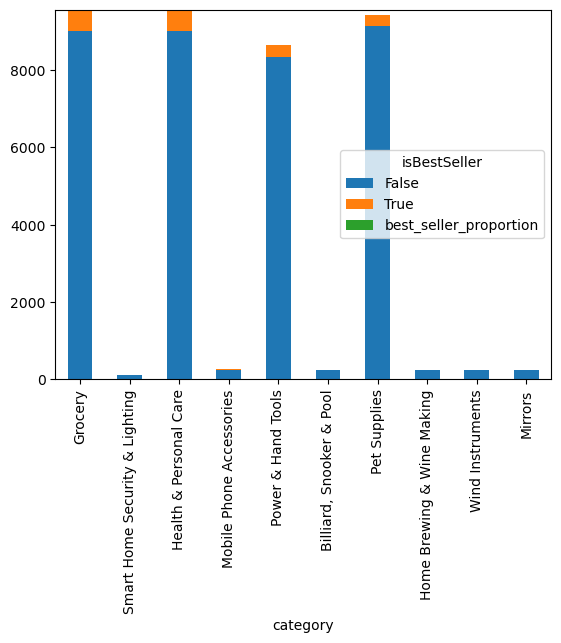

In [25]:
df_sorted_by_proportion.plot(kind="bar", stacked=True)

<Axes: xlabel='category', ylabel='count'>

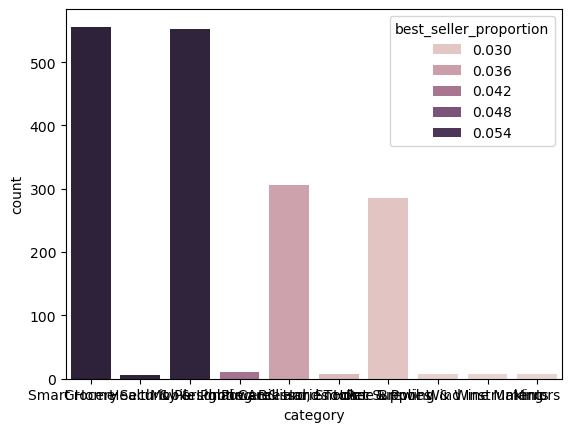

In [30]:
sns.countplot(data=df_sorted_by_proportion, x='category', hue='best_seller_proportion')

In [ ]:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
